In [2]:
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random as rnd
import datetime 

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot

In [71]:
churn_df = pd.read_csv('customer_churn.csv')

In [72]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [73]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


#### Which features are categorical?
- State, Area Code, Phone, Int'l Plan, Churn?

#### Which features are continuous?
- Account length, Vmail Message, Day Mins, Day Calls, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, Intl Calls, Intl Charge, CustServCalls

#### Which features are mixed data types?
- None

#### Which features contain blank, null or empty values?
- None

#### Convert 'Churn?' variable from Categorical to Numerical value

In [74]:
churn = churn_df['Churn?'].map({'False.':0, 'True.':1})
churn_df['churn'] = churn
churn_df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False.,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False.,0


In [75]:
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


#### % of Customers that Churn: 14.49% or 483 people

In [76]:
total_churn = churn_df['churn'].sum()
total_churn

483

#### Which features have null values? None

In [77]:
churn_df.isnull().any()

State             False
Account Length    False
Area Code         False
Phone             False
Int'l Plan        False
VMail Plan        False
VMail Message     False
Day Mins          False
Day Calls         False
Day Charge        False
Eve Mins          False
Eve Calls         False
Eve Charge        False
Night Mins        False
Night Calls       False
Night Charge      False
Intl Mins         False
Intl Calls        False
Intl Charge       False
CustServ Calls    False
Churn?            False
churn             False
dtype: bool

##### % of population that have 0 voicemails: 72%

In [78]:
churn_df.describe([0.73, 0.74])

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
73%,125.000000,415.000000,14.000000,213.800000,113.000000,36.350000,231.972000,112.000000,19.717200,231.736000,112.000000,10.430000,11.900000,6.000000,3.210000,2.000000,0.000000
74%,126.000000,415.000000,17.000000,215.100000,113.000000,36.570000,233.500000,113.000000,19.850000,233.400000,113.000000,10.500000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


#### % of population that have 0 customer service calls: 20%

In [79]:
churn_df.describe([0.20,.21])

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,67.000000,408.000000,0.000000,134.740000,84.000000,22.908000,158.940000,84.000000,13.514000,158.600000,83.000000,7.140000,8.000000,2.400000,2.160000,0.000000,0.000000
21%,68.000000,408.000000,0.000000,136.800000,85.000000,23.260000,160.672000,84.000000,13.657200,160.300000,84.000000,7.210000,8.100000,3.000000,2.190000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


#### Is 'state' correlated with churn? No

In [80]:
state_df= churn_df[['State','churn']].groupby(['State'], as_index=False).sum()

In [81]:
state_df.sort_values(by=['churn'], ascending=False)

,State,churn
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15
34,NY,15
26,MT,14
33,NV,14
25,MS,14
40,SC,14


#### Is customer service calls correlated with churn? 81% of churn customers make a call.

In [82]:
custserv_df= churn_df[['CustServ Calls','churn']].groupby(['CustServ Calls'], as_index=False).sum()
custserv_df['churn']/total_churn

0    0.190476
1    0.252588
2    0.180124
3    0.091097
4    0.157350
5    0.082816
6    0.028986
7    0.010352
8    0.002070
9    0.004141
Name: churn, dtype: float64

In [83]:
custserv_df

,CustServ Calls,churn
0,0,92
1,1,122
2,2,87
3,3,44
4,4,76
5,5,40
6,6,14
7,7,5
8,8,1
9,9,2


Text(0,0.5,'# of Churned Customers')

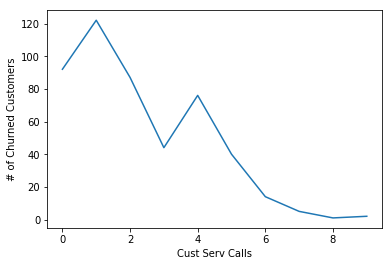

In [84]:
cust_churn = custserv_df['churn'].plot()
cust_churn.set_xlabel('Cust Serv Calls')
cust_churn.set_ylabel('# of Churned Customers')

#### Next step is to investigate minutes usage. Daytime charges have the highest max and median charges

In [88]:
daycharge_df = churn_df[['Day Charge','churn']].groupby(['Day Charge'], as_index=False).sum()
daycharge_df.sort_values(by=['churn'], ascending=False)

,Day Charge,churn
1594,48.81,2
714,28.41,2
1352,41.17,2
1642,53.04,2
1458,44.10,2
1401,42.47,2
1633,51.66,2
1525,46.09,2
1402,42.48,2
1442,43.59,2
